# Implementation of keypoint matching model
Here we will implement a model class for keypoint-matching and test it on the full dataset.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import keypoint_matching as kpm
import kpm_model as model
import cv2
import os

SIFT = cv2.xfeatures2d.SIFT_create()
SIFTMatcher = model.KeypointMatcher(SIFT, cv2.NORM_L2SQR)

In [2]:
car_logos = ["Citroen",
             "Citroen-text",
             "Ferrari",
             "Kia",
             "Mercedes",
             "Peugeot"]

# Read template images
for logo in car_logos:
    logo_filename = os.path.join("data", "logos", logo.lower() + '.jpg')
    logo_image = cv2.imread(logo_filename)
    SIFTMatcher.add_template(logo, logo_image)

In [3]:
import load_data as ld
metadata = ld.read_metadata()
metadata = ld.filter_by_boundingbox(metadata, 10, 800)
test_logo = "Peugeot"
#car_metadata = metadata[metadata.category == 'car']
car_metadata = metadata[(metadata.brand == test_logo) & (metadata.ok == True)]

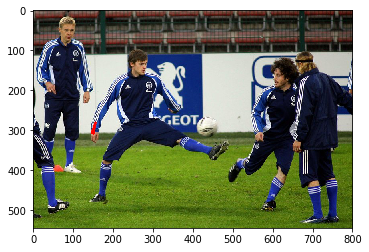

In [ ]:
%%time
from model_validation import validate_detected_objects

images = car_metadata["image_file"].unique()

true_positives = 0
false_positives = 0

for image in images:
    # Fetch corresponding annotations
    BL_Annotations = car_metadata[car_metadata["image_file"] == image]
    test_image = cv2.imread(os.path.join("data", "images", image))
    detected_objects = SIFTMatcher.detect_objects(test_image)
    
    # Validation
    correct_match = validate_detected_objects(BL_Annotations, detected_objects)
    
    
    annotated_image = model.annotate_image_with_objects(test_image, detected_objects, correct_match = correct_match)
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.show()